# Test Saved Model

In [1]:
import io
import os
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

In [2]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path (this can be local or on colossus)

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [3]:
# Load the COCO Label Map
category_index = {
    1: {'id': 1, 'name': 'masa'},
}

In [4]:
start_time = time.time()
tf.keras.backend.clear_session()

SAVED_MODEL_PATH = "/home/auraham/git/tf_object_detection_api/workspace/training_demo/exported_models/centernet_hg104_512x512_coco17_tpu-8/saved_model"

#detect_fn = tf.saved_model.load('models/research/object_detection/test_data/efficientdet_d5_coco17_tpu-32/saved_model/')
detect_fn = tf.saved_model.load(SAVED_MODEL_PATH)

end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 61.15858697891235s


paciente2_114.jpg
paciente1_42.jpg
paciente3_88.jpg
Elapsed time: 1.3947765827178955 second per image


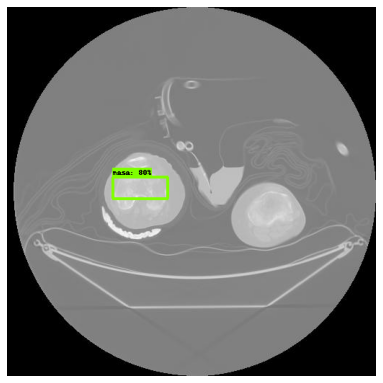

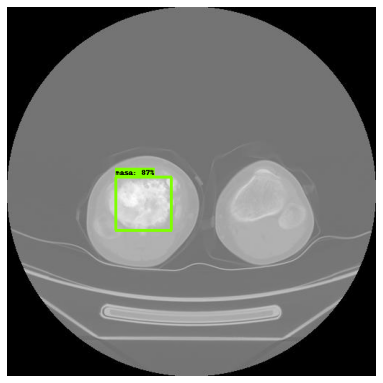

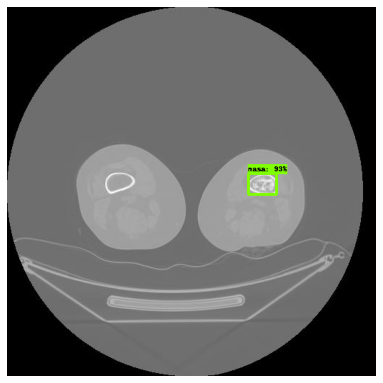

In [16]:
import time
import glob

image_dir = 'models/research/object_detection/test_images'
image_dir = "../images/test"

IMAGES = glob.glob(image_dir + "/*.jpg")

elapsed = []
for i in range(len(IMAGES)):
    #image_path = os.path.join(image_dir, 'image' + str(i + 1) + '.jpg')
    image_path = IMAGES[i]
    image_np = load_image_into_numpy_array(image_path)
    input_tensor = np.expand_dims(image_np, 0)
    start_time = time.time()
    detections = detect_fn(input_tensor)
    end_time = time.time()
    elapsed.append(end_time - start_time)

    plt.rcParams['figure.figsize'] = [42, 21]
    fig = plt.figure(figsize=(5.12, 5.12))
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)
    ax.imshow(image_np_with_detections, aspect="auto")
    
    # save figure
    figname = os.path.splitext(os.path.basename(image_path))[0] + ".jpg"
    fig.savefig(figname, dpi=100)
    print(figname)
    
mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')